In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

In [22]:
# Load the dataset
df = pd.read_csv('climate_action_data.csv')

# Preview the dataset
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


In [24]:
df.describe()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1430,2026-09-10,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2430
freq,2,2,5,11,13,8,203,8,11,2


In [25]:
df.shape

(913, 10)

In [26]:
df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [27]:
# Handle missing values
# For numerical columns, we can fill missing values with the mean or median
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)','Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce') #Convert to numeric, coercing errors to NaN
        # fill NaN values with the mean of the column
        df[col] = df[col].fillna(df[col].median())
        
# For categorical columns, we can fill missing values with the mode
categorical_cols = ['Crop_Type']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])  # fill NaN values with the mode of the column
# Check again for missing values
print("Missing values after handling:")
print(df.isnull().sum())

        

Missing values after handling:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [28]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [29]:
# Convert numeric columns to float
numeric_columns = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [30]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 111


In [31]:
# Remove duplicates
df = df.drop_duplicates()
print("Number of rows after removing duplicates:", df.shape[0])
# Check for duplicates dates
print("Number of duplicate dates:", df['Date'].duplicated().sum())
# Remove duplicate dates
df = df.drop_duplicates(subset=['Date'], keep='first')

# Shape
df.shape

Number of rows after removing duplicates: 802
Number of duplicate dates: 3


(799, 10)

In [32]:
# Display current missing values
print("Missing values before handling:\n", df.isna().sum())

# Drop rows with missing 'Date' or 'Crop_Type' (important for analysis)
df.dropna(subset=['Date', 'Crop_Type'], inplace=True)

# Fill missing numeric values with column mean
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())

# Verify all missing values are handled
print("Missing values after cleaning:\n", df.isna().sum())


Missing values before handling:
 Sensor_ID                        0
Date                             1
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64
Missing values after cleaning:
 Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [35]:
# Final clean dataset
df.info()
# Check empty values again
print("Missing values after all cleaning:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 798 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      798 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               798 non-null    float64       
 3   Soil_pH                        798 non-null    float64       
 4   Temperature(C)                 798 non-null    float64       
 5   Humidity(%)                    798 non-null    float64       
 6   Crop_Type                      798 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  798 non-null    float64       
 8   Irrigation_Recommended(mm)     798 non-null    float64       
 9   Drone_Image_ID                 798 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.6+ KB
Missing values after all

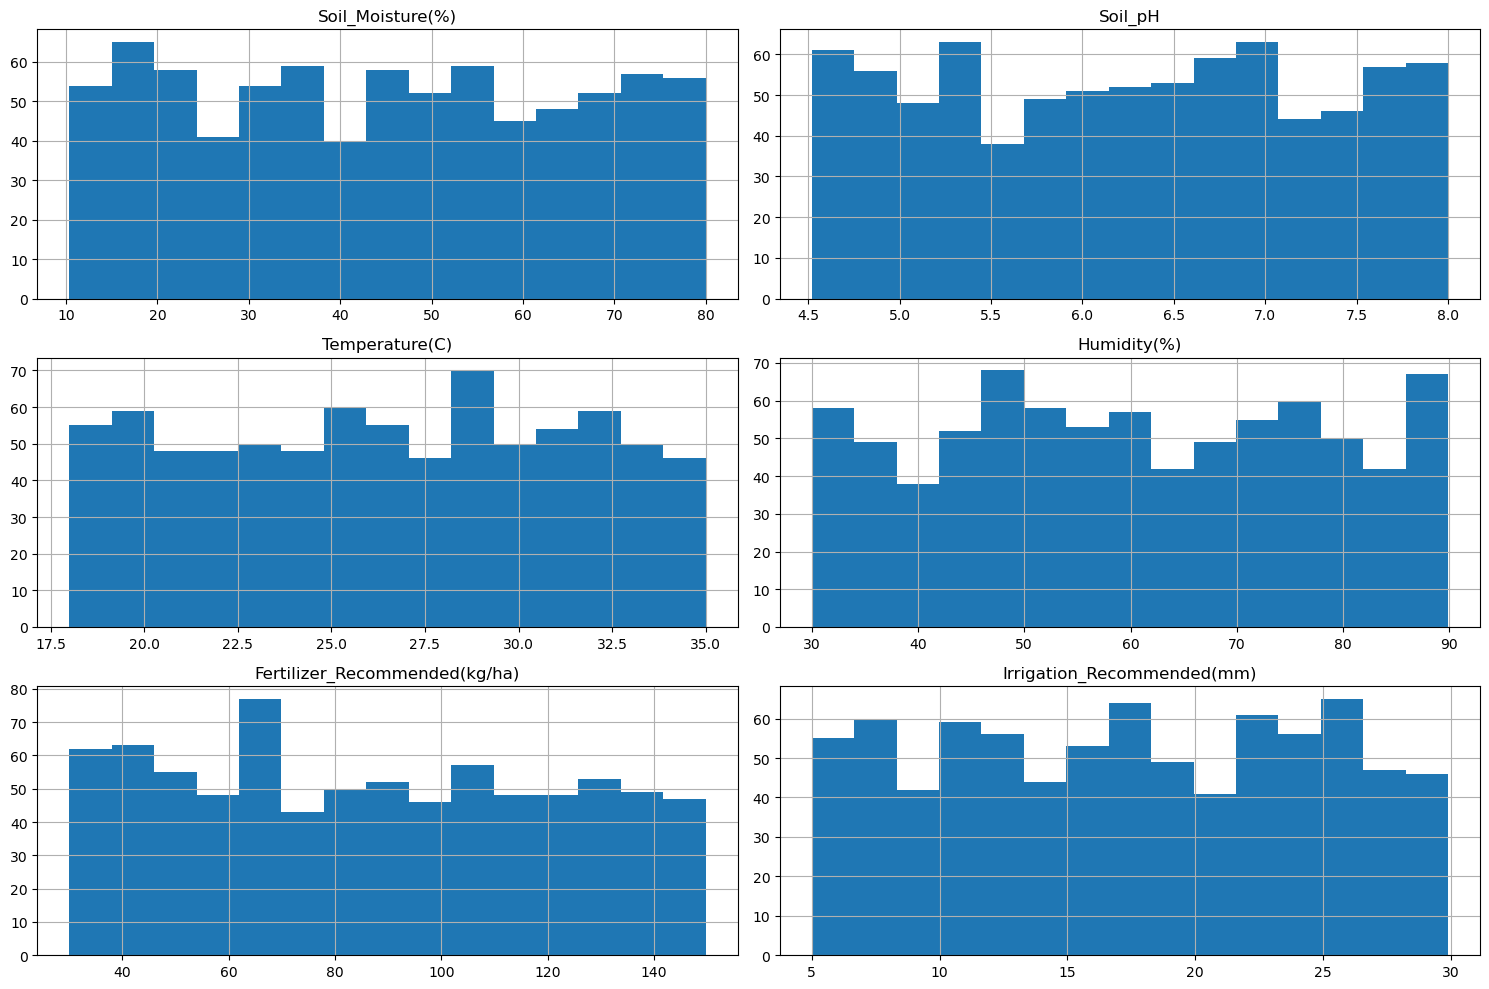

In [36]:
# Plot histograms for all numeric columns
df[numeric_columns].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()


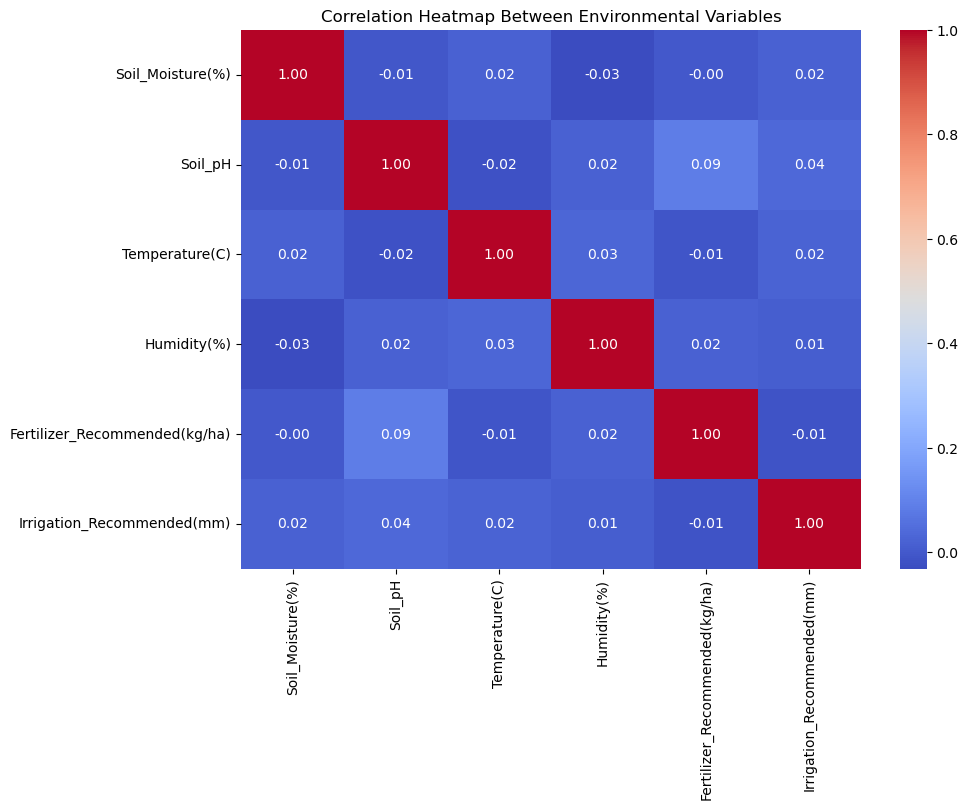

In [37]:
# Compute correlation matrix
correlation = df[numeric_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap Between Environmental Variables")
plt.show()


In [41]:
# Group by Crop_Type and compute average temperature
avg_temp_by_crop = df.groupby("Crop_Type")["Temperature(C)"].mean()

# Identify crop with highest average temperature
max_crop = avg_temp_by_crop.idxmax()
max_temp = avg_temp_by_crop.max()

print(f"Crop with the highest average temperature: {max_crop} ({max_temp:.2f}°C)")


Crop with the highest average temperature: Maize (27.01°C)


In [38]:
# Variables influencing Fertilizer
fert_corr = correlation['Fertilizer_Recommended(kg/ha)'].drop('Fertilizer_Recommended(kg/ha)')
print("Variables most influencing fertilizer recommendation:\n", fert_corr.sort_values(ascending=False))

# Crop type with highest average soil moisture
highest_moisture_crop = df.groupby("Crop_Type")["Soil_Moisture(%)"].mean().idxmax()
print(f"Crop type with highest average soil moisture: {highest_moisture_crop}")

# Irrigation suggestion for temperature > 30°C
hot_crops = df[df['Temperature(C)'] > 30].groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean()
print("\nSuggested irrigation (mm) for crops with temperature > 30°C:\n", hot_crops)


Variables most influencing fertilizer recommendation:
 Soil_pH                       0.085570
Humidity(%)                   0.017062
Soil_Moisture(%)             -0.001722
Temperature(C)               -0.008140
Irrigation_Recommended(mm)   -0.012448
Name: Fertilizer_Recommended(kg/ha), dtype: float64
Crop type with highest average soil moisture: Wheat

Suggested irrigation (mm) for crops with temperature > 30°C:
 Crop_Type
Beans       17.857692
Lettuce     16.297297
Maize       16.625455
Tomatoes    18.919565
Wheat       18.645946
Name: Irrigation_Recommended(mm), dtype: float64


In [39]:
# Save cleaned dataset
df.to_csv("cleaned_precision_agriculture_data.csv", index=False)
print("Cleaned dataset saved successfully.")


Cleaned dataset saved successfully.
